# EXPLORATORY DATA ANALYSIS

Luana Rodriquez, the senior data analyst at Automatidata, is pleased with the work we have already completed and requests our assistance with some EDA and data visualization work for the New York City Taxi and Limousine Commission project (New York City TLC) to get a general understanding of what taxi ridership looks like. The management team is asking for a Python notebook showing data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help understand the data. At the very least, include a box plot of the ride durations and some time series plots, like a breakdown by quarter or month. 


## Plan 

1. Identify any outliers:


*   What methods are best for identifying outliers?
  * Use numpy functions to investigate the `mean()` and `median()` of the data and understand range of data values
  * Use a boxplot to visualize the distribution of the data
  * Use histograms to visualize the distribution of the data
*   How do you make the decision to keep or exclude outliers from any future models?
  * There are three main options for dealing with outliers: keeping them as they are, deleting them, or reassigning them. Whether you keep outliers as they are, delete them, or reassign values is a decision that you make taking into account the nature of the outlying data and the assumptions of the model you are building. To help you make the decision, you can start with these general guidelines:

      * Delete them: If you are sure the outliers are mistakes, typos, or errors and the dataset will be used for modeling or machine learning, then you are more likely to decide to delete outliers. Of the three choices, you’ll use this one the least.
      * Reassign them: If the dataset is small and/or the data will be used for modeling or machine learning, you are more likely to choose a path of deriving new values to replace the outlier values.
      * Leave them: For a dataset that you plan to do EDA/analysis on and nothing else, or for a dataset you are preparing for a model that is resistant to outliers, it is most likely that you are going to leave them in.



Decide which columns are applicable

Given our scenario, which data columns are most applicable? 
Which data columns can I eliminate, knowing they won’t solve our problem scenario? 

Consider functions that help you understand and structure the data. 

*    `head()`
*    `describe()`
*    `info()`
*    `groupby()`
*    `sortby()`

Consider these questions as you work: 

What do you do about missing data (if any)? 

Are there data outliers?  

What do the distributions of your variables tell you about the question you're asking or the problem you're trying to solve?

Find these answers later in the notebook. 


In [1]:
# Import relevant libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df= pd.read_csv(r'C:\Users\user\Desktop\2017_Yellow_Taxi_Trip_Data.csv')
df.head(5)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [23]:
df.shape

(22699, 18)

In [13]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

## Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the TLC dataset. What type of data visualization(s) would be most helpful? 

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map

### Quick Insight

As you'll see below, a bar chart, box plot and scatter plot will be most helpful in your understanding of this data. 

*A box plot will be helpful to determine outliers and where the bulk of the data points reside in terms of `trip_distance`, `duration`, and `total_amount`*

*A scatter plot will be helpful to visualize the trends and patters and outliers of critical variables, such as `trip_distance` and `total_amount`*

*A bar chart will help determine average number of trips per month, weekday, weekend, etc.*

In [35]:
## Convert date columns to datetime
df['tpep_pickup_datetime']= pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']= pd.to_datetime(df['tpep_dropoff_datetime'])

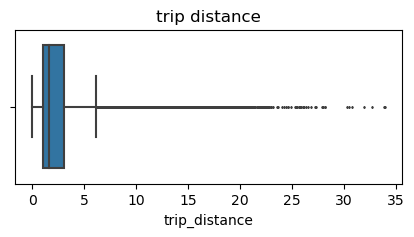

In [61]:
# create a box plot of trip_distance
plt.figure(figsize=(5, 2))
plt.title('trip distance')
sns.boxplot(data=df, x=df['trip_distance'], fliersize=1)
plt.show()

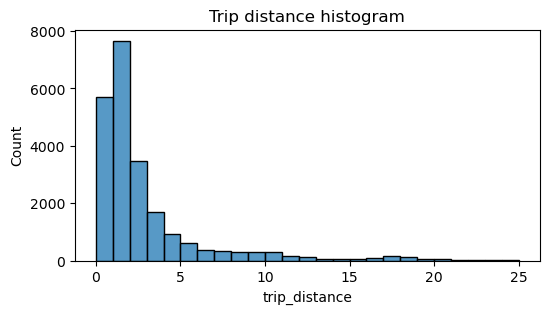

In [70]:
# Create histogram for trip distance
plt.figure(figsize= (6,3))
plt.title('Trip distance histogram')
sns.histplot(data= df, x=df['trip_distance'], bins=range(0, 26, 1))
plt.show()

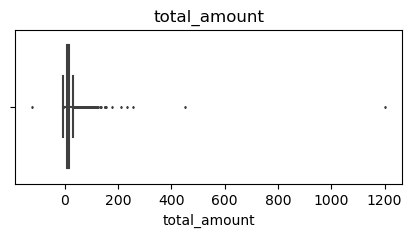

In [73]:
# Create box plot of total_amount
plt.figure(figsize=(5, 2))
plt.title('total_amount')
sns.boxplot(x=df['total_amount'], fliersize=1)
plt.show()

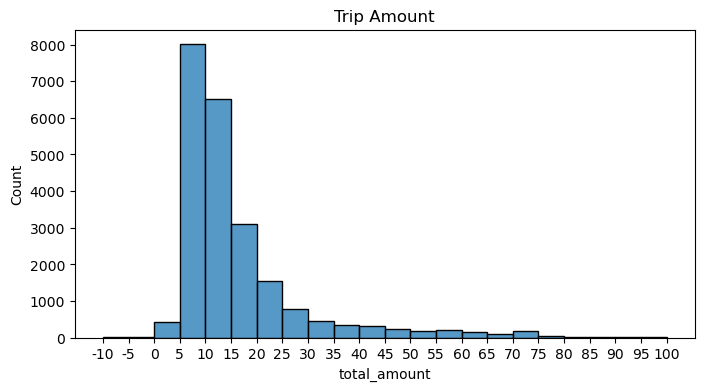

In [81]:
# Create histogram for total_amount
plt.figure(figsize= (8,4))
plot= sns.histplot(data= df, x=df['total_amount'], bins=range(-10, 101, 5))
plot.set_xticks(range(-10, 101, 5))
plot.set_xticklabels(range(-10, 101, 5))
plt.title('Trip Amount')
plt.show()

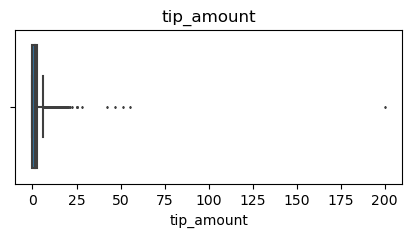

In [89]:
# Create box plot of tip_amount
plt.figure(figsize=(5,2))
plt.title('tip_amount')
sns.boxplot(x=df['tip_amount'], fliersize=1);

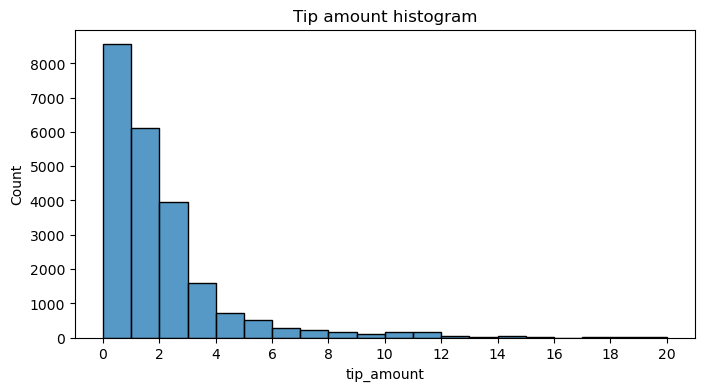

In [90]:
# Create histogram of tip_amount
plt.figure(figsize=(8,4))
ax = sns.histplot(df['tip_amount'], bins=range(0,21,1))
ax.set_xticks(range(0,21,2))
ax.set_xticklabels(range(0,21,2))
plt.title('Tip amount histogram');

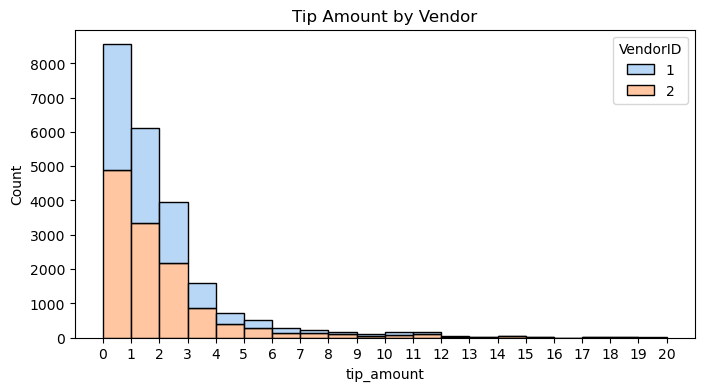

In [106]:
# Create tip amount by Vendor
plt.figure(figsize= (8,4))
plot=sns.histplot(data= df, x=df['tip_amount'],
                 hue= 'VendorID',
                 multiple= 'stack',
                 bins=range(0,21,1),
                 palette= 'pastel')
plot.set_xticks(range(0, 21, 1))
plot.set_xticklabels(range(0, 21, 1))
plt.title('Tip Amount by Vendor')
plt.show()

In [108]:
# Lets see the number of counts for each vendor
df['VendorID'].value_counts()

2    12626
1    10073
Name: VendorID, dtype: int64

In [122]:
Vendor_1= (10073/22699)*100
Vendor_2= (12626/22699)*100
print(Vendor_1)
print(Vendor_2)

44.37640424688312
55.623595753116874


### Quick Insight
Separating the tip amount by vendor reveals that there are no noticeable aberrations in the distribution of tips between the two vendors in the dataset. Vendor two has a slightly higher share of the rides, and this proportion is approximately maintained for all tip amounts.

Little wonder Vendor 2 has sligtly more tip than Vendor 1. This is because Vendor 2 has more counts than vendor 1 as seen in the above cell.

Next, zoom in on the upper end of the range of tips to check whether vendor one gets noticeably more of the most generous tips.



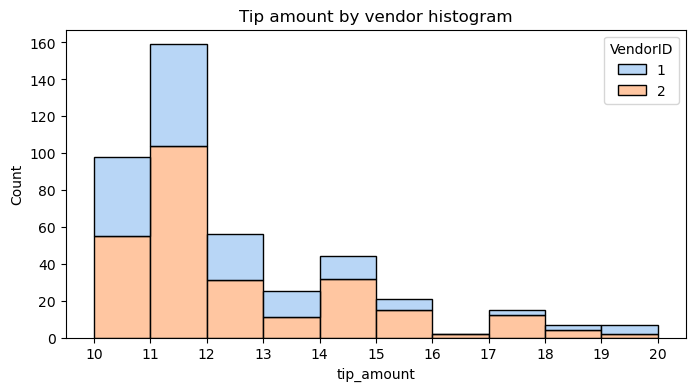

In [131]:
# Create histogram of tip_amount by vendor for tips > $10 
tips_over_ten = df[df['tip_amount'] > 10]
plt.figure(figsize=(8,4))
plot = sns.histplot(data=tips_over_ten, x='tip_amount', bins=range(10,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
plot.set_xticks(range(10,21,1))
plot.set_xticklabels(range(10,21,1))
plt.title('Tip amount by vendor histogram');

### Quick Insight 
The proportions are maintained even at these higher tip amounts, with the exception being at highest extremity, but this is not noteworthy due to the low sample size at these tip amounts.

## Mean tips by passenger count

Examine the unique values in the `passenger_count` column.

In [133]:
df['passenger_count'].value_counts()

1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: passenger_count, dtype: int64

### Quick Insight
Nearly two thirds of the rides were single occupancy, though there were still nearly 700 rides with as many as six passengers. Also, there are 33 rides with an occupancy count of zero, which doesn't make sense. These would likely be dropped unless a reasonable explanation can be found for them.

In [141]:
# calculate the mean tip by passenger count
mean_tips_by_passenger_count= df.groupby(['passenger_count']).mean()[['tip_amount']]
mean_tips_by_passenger_count

,tip_amount
passenger_count,
0,2.135758
1,1.848920
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


### Create month and day columns

In [146]:
# Create month column
df['month']= df['tpep_pickup_datetime'].dt.month_name()
# Create day column
df['day']= df['tpep_pickup_datetime'].dt.day_name()

### Plot total ride count by month

Begin by calculating total ride count by month.

In [164]:
# Get total number of rides by month
monthly_rides= df['month'].value_counts()
monthly_rides

March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: month, dtype: int64

## Quick Insight
The months are out of order. It was arranged in descending order

Reorder the results to put the months in calendar order.

In [165]:
# Reorder the monthly ride list so months go in order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

monthly_rides = monthly_rides.reindex(index=month_order)
monthly_rides

January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: month, dtype: int64

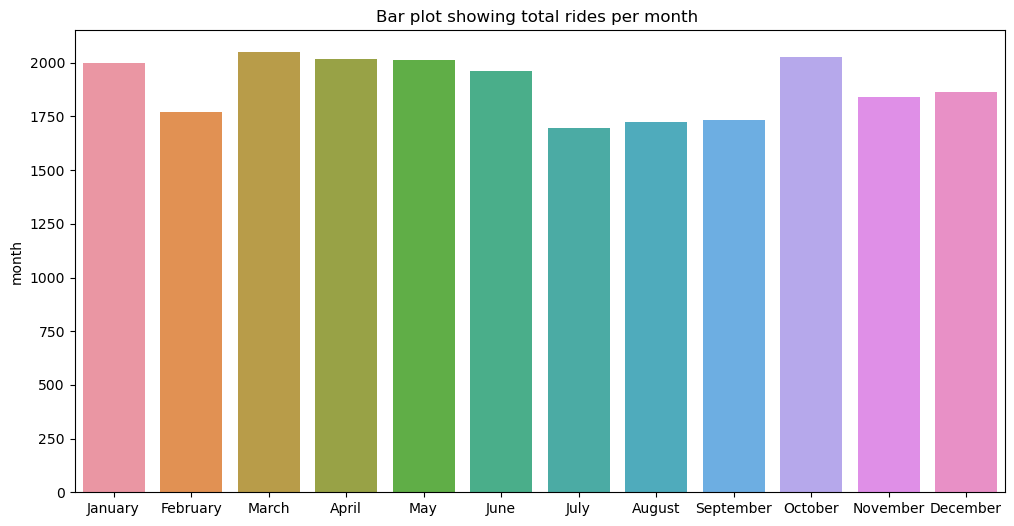

In [184]:
# Create a bar plot of total rides per month
plt.figure(figsize=(12,6))
plot= sns.barplot(x=monthly_rides.index, y=monthly_rides)
plot.set_xticklabels(month_order)
plt.title('Bar plot showing total rides per month ');

### Quick Insight
Monthly rides are fairly consistent, with notable dips in the summer months of July, August, and September, and also in February.

## Plot mean trip distance by drop-off location

In [190]:
# Get number of unique drop-off location IDs
df['DOLocationID'].nunique()

216

In [198]:
# Calculate the mean trip distance for each drop-off location
distance_by_dropoff= df.groupby('DOLocationID').mean()[['trip_distance']]
# Sort the results in descending order by mean trip distance
distance_by_dropoff= distance_by_dropoff.sort_values(by= 'trip_distance', ascending= True)
distance_by_dropoff

,trip_distance
DOLocationID,
207,1.200000
193,1.390556
237,1.555494
234,1.727806
137,1.818852
...,...
51,17.310000
11,17.945000
210,20.500000


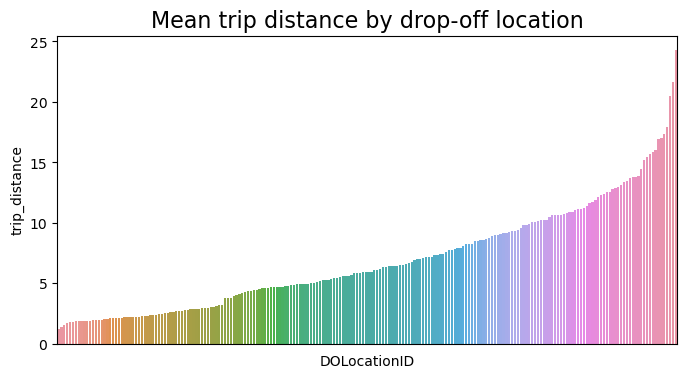

In [209]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=distance_by_dropoff.index, 
                 y=distance_by_dropoff['trip_distance'],
                 order=distance_by_dropoff.index)
ax.set_xticklabels([])
ax.set_xticks([])
plt.title('Mean trip distance by drop-off location', fontsize=16);

## Quick Insight
This plot presents a characteristic curve related to the cumulative density function of a normal distribution. In other words, it indicates that the drop-off points are relatively evenly distributed over the terrain. This is good to know, because geographic coordinates were not included in this dataset, so there was no obvious way to test for the distibution of locations. 

## Histogram of rides by drop-off location

First, check whether the drop-off locations IDs are consecutively numbered. For instance, does it go 1, 2, 3, 4..., or are some numbers missing (e.g., 1, 3, 4...). If numbers aren't all consecutive, the histogram will look like some locations have very few or no rides when in reality there's no bar because there's no location. 

There are many ways to do this.

In [210]:
# Check if all drop-off locations are consecutively numbered
df['DOLocationID'].max() - len(set(df['DOLocationID'])) 

49

### Quick Insight
There are 49 numbers that do not represent a drop-off location. 

To eliminate the spaces in the historgram that these missing numbers would create, sort the unique drop-off location values, then convert them to strings. This will make the histplot function display all bars directly next to each other. 

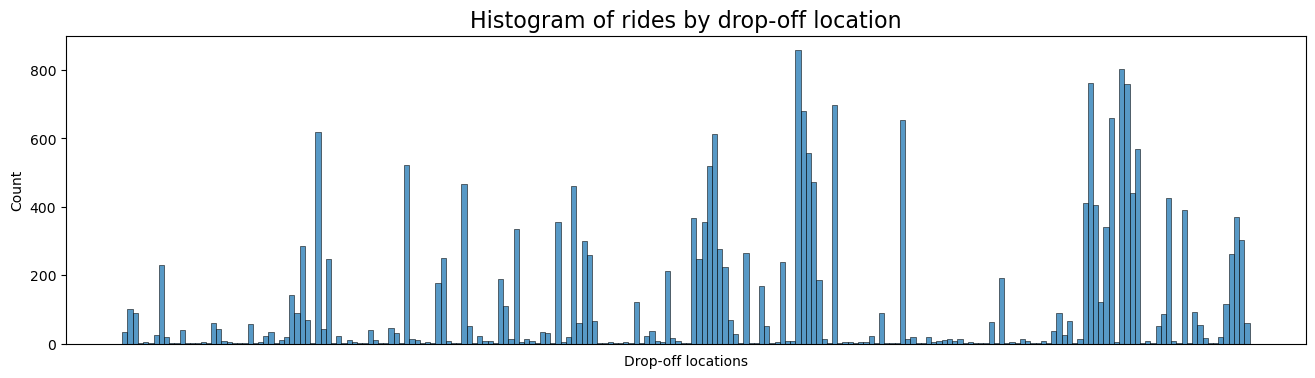

In [211]:
plt.figure(figsize=(16,4))
# DOLocationID column is numeric, so sort in ascending order
sorted_dropoffs = df['DOLocationID'].sort_values()
# Convert to string
sorted_dropoffs = sorted_dropoffs.astype('str')
# Plot
sns.histplot(sorted_dropoffs, bins=range(0, df['DOLocationID'].max()+1, 1))
plt.xticks([])
plt.xlabel('Drop-off locations')
plt.title('Histogram of rides by drop-off location', fontsize=16);

### Quick Insight
Notice that out of the 200+ drop-off locations, a disproportionate number of locations receive the majority of the traffic, while all the rest get relatively few trips. It's likely that these high-traffic locations are near popular tourist attractions like the Empire State Building or Times Square, airports, and train and bus terminals. However, it would be helpful to know the location that each ID corresponds with. Unfortunately, this is not in the data.

## PACE: Execute 



###  Results and evaluation

Having built visualizations in Python, what have you learned about the dataset? What other questions have your visualizations uncovered that you should pursue? 


# FINAL INSIGHTS
I have learned that the highest distribution of trip distances are below 5 miles, but there are outliers all the way out to 35 miles. There are no missing values. 

My other questions are .... There are several trips that have a trip distance of "0.0." What might those trips be? Will they impact our model? 

My client would likely want to know ... that the data includes dropoff and pickup times. We can use that information to derive a trip duration for each line of data. This would likely be something that will help the client with their model. 
